In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob
import cv2

In [5]:
sys.path

['/home/romain/Documents/BackUp/Special/Projets/Code_IIA/Projet_8/Aporia/notebooks',
 '/home/romain/anaconda3/lib/python39.zip',
 '/home/romain/anaconda3/lib/python3.9',
 '/home/romain/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/home/romain/.local/lib/python3.9/site-packages',
 '/home/romain/anaconda3/lib/python3.9/site-packages',
 '/home/romain/anaconda3/lib/python3.9/site-packages/tensorflow_docs-0.0.0.dev0-py3.9.egg',
 '/home/romain/anaconda3/lib/python3.9/site-packages/astor-0.8.1-py3.9.egg',
 '/home/romain/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg',
 '/home/romain/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/home/romain/.ipython']

In [2]:
# Installation de OpenCV
#!pip install opencv-contrib-python-headless

In [328]:
mask_list = glob.glob('../data/finetuning/gtFine/**/*polygons.json', recursive=True)

In [32]:
pd.read_json(mask_list[1])['objects'].shape[0]

0     {'label': 'road', 'polygon': [[0, 513], [2047,...
1     {'label': 'sidewalk', 'polygon': [[2048, 369],...
2     {'label': 'terrain', 'polygon': [[114, 504], [...
3     {'label': 'building', 'polygon': [[2, 2], [753...
4     {'label': 'pole', 'polygon': [[366, 406], [366...
                            ...                        
62    {'label': 'bicycle', 'polygon': [[945, 396], [...
63    {'label': 'bicycle', 'polygon': [[1239, 412], ...
64    {'label': 'rider', 'polygon': [[1280, 383], [1...
65    {'label': 'ego vehicle', 'polygon': [[271, 102...
66    {'label': 'out of roi', 'polygon': [[0, 0], [2...
Name: objects, Length: 67, dtype: object

In [34]:
list_label = []
for i in range(len(mask_list)):
    num_ind = pd.read_json(mask_list[i])['objects'].shape[0]
    for j in range(num_ind):
        lab = pd.read_json(mask_list[i])['objects'].iloc[j]['label']
        if lab not in list_label:
            list_label.append(lab)
            

In [35]:
list_label

['static',
 'sky',
 'road',
 'sidewalk',
 'vegetation',
 'building',
 'pole',
 'traffic light',
 'car',
 'dynamic',
 'person',
 'traffic sign',
 'trailer',
 'license plate',
 'rider',
 'bicycle',
 'ego vehicle',
 'out of roi',
 'terrain',
 'bicyclegroup',
 'parking',
 'ground',
 'caravan',
 'wall',
 'motorcycle',
 'fence',
 'bus',
 'truck',
 'bridge',
 'cargroup',
 'persongroup',
 'polegroup',
 'guard rail',
 'rectification border',
 'train',
 'rail track',
 'ridergroup',
 'tunnel',
 'motorcyclegroup',
 'truckgroup']

```
['static',
 'sky',
 'road',
 'sidewalk',
 'vegetation',
 'building',
 'pole',
 'traffic light',
 'car',
 'dynamic',
 'person',
 'traffic sign',
 'trailer',
 'license plate',
 'rider',
 'bicycle',
 'ego vehicle',
 'out of roi',
 'terrain',
 'bicyclegroup',
 'parking',
 'ground',
 'caravan',
 'wall',
 'motorcycle',
 'fence',
 'bus',
 'truck',
 'bridge',
 'cargroup',
 'persongroup',
 'polegroup',
 'guard rail',
 'rectification border',
 'train',
 'rail track',
 'ridergroup',
 'tunnel',
 'motorcyclegroup',
 'truckgroup']
 ```

In [36]:
len(list_label)

40

```
40
```

In [323]:
dict_label = {'road': 'flat', 'sidewalk': 'flat', 'parking': 'flat','rail track': 'flat',
'person': 'human','rider': 'human',
'truck': 'vehicle',  'car': 'vehicle', 'bus': 'vehicle', 'on rails': 'vehicle',
 'motorcycle': 'vehicle', 'bicycle': 'vehicle', 'caravan': 'vehicle',
 'trailer': 'vehicle',
'building': 'construction', 'wall': 'construction', 'fence': 'construction', 'guard rail': 'construction',
 'bridge': 'construction', 'tunnel': 'construction',
'pole': 'object', 'pole group': 'object', 'traffic sign': 'object',
 'traffic light': 'object',
'vegetation': 'nature', 'terrain': 'nature',
'ground': 'void', 'dynamic': 'void', 'static': 'void',
'flat': 'flat', 'human': 'human', 'vehicle': 'vehicle', 'construction': 'construction',
'object': 'object', 'nature': 'nature', 'void': 'void', 'sky': 'sky',
              
'license plate': 'vehicle',
 'ego vehicle': 'void',
 'out of roi': 'void',
 'bicyclegroup': 'vehicle',
 'cargroup': 'vehicle',
 'persongroup': 'human',
 'polegroup': 'object',
 'rectification border': 'void',
 'train': 'vehicle',
 'ridergroup': 'vehicle',
 'motorcyclegroup': 'vehicle',
 'truckgroup': 'vehicle'
}

In [324]:
[x for x in list_label if x not in list(set(list(dict_label.keys())))]

NameError: name 'list_label' is not defined

```
['license plate',
 'ego vehicle',
 'out of roi',
 'bicyclegroup',
 'cargroup',
 'persongroup',
 'polegroup',
 'rectification border',
 'train',
 'ridergroup',
 'motorcyclegroup',
 'truckgroup']
```

Les mots 'on rails' 'pole group' et 'construction' n’existe pas dans notre base de données contrairement aux informations du site web.

In [49]:
set(list(dict_label.values()))

{'building', 'flat', 'human', 'nature', 'object', 'sky', 'vehicle', 'void'}

```
{'building', 'flat', 'human', 'nature', 'object', 'sky', 'vehicle', 'void'}
```

In [101]:
set(list(dict_label.keys()))

{'bicycle',
 'bicyclegroup',
 'bridge',
 'building',
 'bus',
 'car',
 'caravan',
 'cargroup',
 'construction',
 'dynamic',
 'ego vehicle',
 'fence',
 'flat',
 'ground',
 'guard rail',
 'human',
 'license plate',
 'motorcycle',
 'motorcyclegroup',
 'nature',
 'object',
 'on rails',
 'out of roi',
 'parking',
 'person',
 'persongroup',
 'pole',
 'pole group',
 'polegroup',
 'rail track',
 'rectification border',
 'rider',
 'ridergroup',
 'road',
 'sidewalk',
 'sky',
 'static',
 'terrain',
 'traffic light',
 'traffic sign',
 'trailer',
 'train',
 'truck',
 'truckgroup',
 'tunnel',
 'vegetation',
 'vehicle',
 'void',
 'wall'}

```
{'bicycle',
 'bridge',
 'bus',
 'car',
 'caravan',
 'construction',
 'dynamic',
 'fence',
 'ground',
 'guard rail',
 'motorcycle',
 'on rails',
 'parking',
 'person',
 'pole',
 'pole group',
 'rail track',
 'rider',
 'road',
 'sidewalk',
 'sky',
 'static',
 'terrain',
 'traffic light',
 'traffic sign',
 'trailer',
 'truck',
 'tunnel',
 'vegetation',
 'wall'}
 ```

In [93]:
pd.read_json(mask_list[1])['objects']#.iloc[1]['label']#.shape[0]

0     {'label': 'road', 'polygon': [[0, 513], [2047,...
1     {'label': 'sidewalk', 'polygon': [[2048, 369],...
2     {'label': 'terrain', 'polygon': [[114, 504], [...
3     {'label': 'building', 'polygon': [[2, 2], [753...
4     {'label': 'pole', 'polygon': [[366, 406], [366...
                            ...                        
62    {'label': 'bicycle', 'polygon': [[945, 396], [...
63    {'label': 'bicycle', 'polygon': [[1239, 412], ...
64    {'label': 'rider', 'polygon': [[1280, 383], [1...
65    {'label': 'ego vehicle', 'polygon': [[271, 102...
66    {'label': 'out of roi', 'polygon': [[0, 0], [2...
Name: objects, Length: 67, dtype: object

In [69]:
df.at[0, 'objects']['label'] = dict_label['road']

In [75]:
df.at[0, 'objects']['label']

'flat'

In [76]:
dict_label['flat']

'flat'

In [90]:
df.to_json('test.json', orient='columns')

In [78]:
mask_list[1]

'../data/finetuning/gtFine/val/munster/munster_000077_000019_gtFine_polygons.json'

In [91]:
pd.read_json('test.json')

,imgHeight,imgWidth,objects
0,1024,2048,"{'label': 'flat', 'polygon': [[0, 513], [2047,..."
1,1024,2048,"{'label': 'sidewalk', 'polygon': [[2048, 369],..."
2,1024,2048,"{'label': 'terrain', 'polygon': [[114, 504], [..."
3,1024,2048,"{'label': 'building', 'polygon': [[2, 2], [753..."
4,1024,2048,"{'label': 'pole', 'polygon': [[366, 406], [366..."
...,...,...,...
62,1024,2048,"{'label': 'bicycle', 'polygon': [[945, 396], [..."
63,1024,2048,"{'label': 'bicycle', 'polygon': [[1239, 412], ..."
64,1024,2048,"{'label': 'rider', 'polygon': [[1280, 383], [1..."
65,1024,2048,"{'label': 'ego vehicle', 'polygon': [[271, 102..."


In [329]:
# Boucle pour transformer les fichiers en 8 groupes
for i in range(len(mask_list)):
    num_ind = pd.read_json(mask_list[i])['objects'].shape[0]
    df = pd.read_json(mask_list[i])
    for j in range(num_ind):
        old_lab = df.at[j, 'objects']['label']
        # Reduce number of category
        df.at[j, 'objects']['label'] = dict_label[old_lab]
    df.to_json(mask_list[i][:-5] + '_octogroups.json', orient='columns')
    del df

# Création d’un calque

In [2]:
layer_list = glob.glob('../data/finetuning/gtFine/**/*octogroups.json', recursive=True)

In [3]:
layer_list[1]

'../data/finetuning/gtFine/val/munster/munster_000125_000019_gtFine_polygons_octogroups.json'

In [4]:
dfl = pd.read_json(layer_list[1])


In [8]:
dfl

,imgHeight,imgWidth,objects
0,1024,2048,"{'label': 'sky', 'polygon': [[645, 1], [1287, ..."
1,1024,2048,"{'label': 'flat', 'polygon': [[2, 731], [972, ..."
2,1024,2048,"{'label': 'nature', 'polygon': [[1139, 441], [..."
3,1024,2048,"{'label': 'construction', 'polygon': [[0, 1], ..."
4,1024,2048,"{'label': 'construction', 'polygon': [[1324, 1..."
...,...,...,...
84,1024,2048,"{'label': 'vehicle', 'polygon': [[1369, 469], ..."
85,1024,2048,"{'label': 'construction', 'polygon': [[1531, 4..."
86,1024,2048,"{'label': 'object', 'polygon': [[1441, 563], [..."
87,1024,2048,"{'label': 'void', 'polygon': [[271, 1023], [38..."


In [6]:
dfl.at[1, 'objects']

{'label': 'flat',
 'polygon': [[2, 731],
  [972, 473],
  [1237, 475],
  [2047, 829],
  [2047, 1023],
  [1305, 1024],
  [662, 1023],
  [0, 1023]]}

In [13]:
h = dfl.at[0, 'imgHeight']
w = dfl.at[0, 'imgWidth']

In [45]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [248]:
mask = np.zeros(np.hstack((h, w)), dtype='uint8')

In [253]:
poly = np.array([dfl.at[1, 'objects']['polygon']])
poly_two = np.array([dfl.at[2, 'objects']['polygon']])

In [254]:
poly_two

array([[[1139,  441],
        [1145,  362],
        [1349,  395],
        [1357,  497],
        [1171,  478],
        [1143,  462]]])

In [261]:
img_mask = cv2.fillPoly(mask, poly, 255)
img_mask_two = cv2.fillPoly(mask, poly_two, 200)

In [262]:
img_mask_two

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [133]:
layer_list[1]

'../data/finetuning/gtFine/val/munster/munster_000125_000019_gtFine_polygons_octogroups.json'

In [134]:
layer_list[1].split('/')[-3]

'val'

In [135]:
# Transformation du nom de masque en nom d’image correspondante.
layer_list[1][:7] + '/coarse_tuning/leftImg8bit/' + layer_list[1].split('/')[-3] + '/' + layer_list[1].split('/')[-2] + '/' + layer_list[1].split('/')[-1][:-31] + 'leftImg8bit.png'

'../data/coarse_tuning/leftImg8bit/val/munster/munster_000125_000019_leftImg8bit.png'

In [136]:
img_name = layer_list[1][:7] + '/coarse_tuning/leftImg8bit/' + layer_list[1].split('/')[-3] + '/' + layer_list[1].split('/')[-2] + '/' + layer_list[1].split('/')[-1][:-31] + 'leftImg8bit.png'

In [137]:
image = cv2.imread(img_name)

In [138]:
def blur(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    return blur

In [139]:
masked_image = cv2.bitwise_and(blur(image), img_mask)

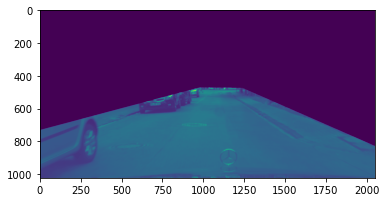

In [140]:
plt.imshow(masked_image)

In [131]:
# Function of polygonal display

In [168]:
len(dfl)


89

In [236]:
def fpd(pic_num, poly_num):
    """Prend le numero de l’image (liste triée), et le numéro du polygone de l’image"""
    layer_list = sorted(glob.glob('../data/finetuning/gtFine/**/*octogroups.json', recursive=True))
    dfl = pd.read_json(layer_list[pic_num])
    h = dfl.at[0, 'imgHeight']
    w = dfl.at[0, 'imgWidth']
    mask = np.zeros(np.hstack((h, w)), dtype='uint8')
    try:
        poly = np.array([dfl.at[poly_num, 'objects']['polygon']])
    except KeyError as e:
        print('Erreur', e, 'La valeur maximum pour poly_num est', len(dfl)-1)
        return
    img_mask = cv2.fillPoly(mask, poly, 255)
    img_name = layer_list[pic_num][:7] + '/coarse_tuning/leftImg8bit/' \
                    + layer_list[pic_num].split('/')[-3] + '/' \
                    + layer_list[pic_num].split('/')[-2] + '/' \
                    + layer_list[pic_num].split('/')[-1][:-31] + 'leftImg8bit.png'
    image = cv2.imread(img_name)
    masked_image = cv2.bitwise_and(blur(image), img_mask)
    print('Label', dfl.at[poly_num, 'objects']['label'])
    plt.imshow(masked_image)

Label construction


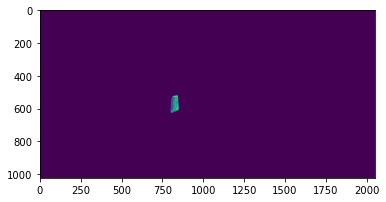

In [242]:
fpd(4999,30)

## Intermède

C’est donc possible d’observer que nos images contiennent bien seulement 8 catégories

In [360]:
def fpd_hegemonia(pic_num):  #AUTOMATION , poly_num):
    """Prend le numero de l’image (liste triée), et le numéro du polygone de l’image"""
    layer_list = sorted(glob.glob('../data/finetuning/gtFine/**/*octogroups.json', recursive=True))
    dfl = pd.read_json(layer_list[pic_num])
    h = dfl.at[0, 'imgHeight']
    w = dfl.at[0, 'imgWidth']
    dict_label_clr = {'construction': 140, 
                          'flat': 80, 
                          'human': 120, 
                          'nature': 40, 
                          'object': 20, 
                          'sky': 60, 
                          'vehicle': 100, 
                          'void': 0}

    img_mask = np.zeros(np.hstack((h, w)), dtype='uint8')
    for poly_num in range(len(dfl)):
        label = dfl.at[poly_num, 'objects']['label']
        poly = np.array([dfl.at[poly_num, 'objects']['polygon']])
        img_mask = cv2.fillPoly(img_mask, poly, dict_label_clr[label])
    img_name = layer_list[pic_num][:7] + '/coarse_tuning/leftImg8bit/' \
                    + layer_list[pic_num].split('/')[-3] + '/' \
                    + layer_list[pic_num].split('/')[-2] + '/' \
                    + layer_list[pic_num].split('/')[-1][:-31] + 'leftImg8bit.png'
    image = cv2.imread(img_name)
    masked_image = cv2.bitwise_and(blur(image), img_mask)
#print('Label', dfl.at[poly_num, 'objects']['label'])
    #plt.imshow(masked_image)
    #plt.imshow(img_mask)
    #plt.imshow(image)
    return image, img_mask, masked_image

In [365]:
image, img_mask, masked_image = fpd_hegemonia(2100)

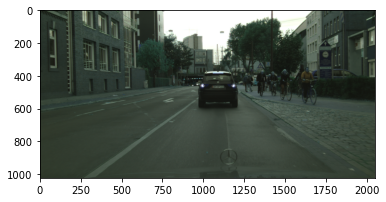

In [366]:
plt.imshow(image)

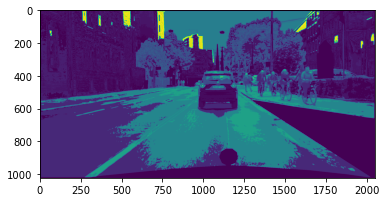

In [367]:
plt.imshow(masked_image)

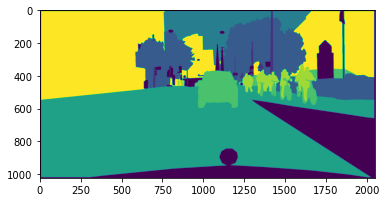

In [368]:
plt.imshow(img_mask)

Et de les écrire au format portable network graphics ou png sans peiner.

In [320]:
cv2.imwrite('calque_test.png', img_mask)


True

## Croître et se multiplier

Nous fusionnons les parties d’intérets contenues dans ce qui précède de notre notebook pour industrialiser le processus de découpage des images, ou création de masque de ségmentation.

In [315]:
layer_list[1][:-4] + 'png'

'../data/finetuning/gtFine/test/berlin/berlin_000001_000019_gtFine_polygons_octogroups.png'

In [372]:
def guineapig():
    """Crée tous les masques, en les laissant inscrit sur le disque"""
    layer_list = sorted(glob.glob('../data/finetuning/gtFine/**/*octogroups.json', recursive=True))
    for pic_num in range(len(layer_list)):
        dfl = pd.read_json(layer_list[pic_num])
        h = dfl.at[0, 'imgHeight']
        w = dfl.at[0, 'imgWidth']
        dict_label_clr = {'construction': 60, 
                          'flat': 30, 
                          'human': 100, 
                          'nature': 80, 
                          'object': 20, 
                          'sky': 40, 
                          'vehicle': 120, 
                          'void': 10}

        img_mask = np.zeros(np.hstack((h, w)), dtype='uint8')
        for poly_num in range(len(dfl)):
            label = dfl.at[poly_num, 'objects']['label']
            poly = np.array([dfl.at[poly_num, 'objects']['polygon']])
            img_mask = cv2.fillPoly(img_mask, poly, dict_label_clr[label])
        img_name = layer_list[pic_num][:7] + '/coarse_tuning/leftImg8bit/' \
                        + layer_list[pic_num].split('/')[-3] + '/' \
                        + layer_list[pic_num].split('/')[-2] + '/' \
                        + layer_list[pic_num].split('/')[-1][:-31] + 'leftImg8bit.png'
        image = cv2.imread(img_name)
        masked_image = cv2.bitwise_and(blur(image), img_mask)
        img_mask_name = layer_list[pic_num][:-4] + 'png'
        cv2.imwrite(img_mask_name, img_mask)
    return 

In [373]:
guineapig()

In [392]:
len(sorted(glob.glob('../data/finetuning/gtFine/train/**/*polygons_octogroups.png')))

2975

In [393]:
len(sorted(glob.glob('../data/coarse_tuning/leftImg8bit/train/**/*.png')))

2975

## Epilogue 

Nous voudrions connaîtrons le nombre maximum de classes dans une seule image.

In [397]:
def epitheme():
    """Compte le nombre maximum de catégorie par image"""
    layer_list = sorted(glob.glob('../data/finetuning/gtFine/**/*octogroups.json', recursive=True))
    n = 0
    for pic_num in range(len(layer_list)):
        nb_pic = 0
        dfl = pd.read_json(layer_list[pic_num])
        img_mask = np.zeros(np.hstack((h, w)), dtype='uint8')
        labels = []
        for poly_num in range(len(dfl)):
            label = dfl.at[poly_num, 'objects']['label']
            if label in labels:
                pass
            else:
                labels.append(label)
        nb_pic = len(labels)
        if n < nb_pic: 
            n = nb_pic
    return n

In [398]:
epitheme()

8